# Probability &mdash; The Intoxicated Waiter

## Introduction

---

### Outline

An intoxicated waiter in a restaurant takes food orders from a party of n people. 
Each person orders a different dish from the menu. 
The waiter gets the correct dishes but, forgetting who gave each order, gives out the food at random. 

 * What the probability that no person gets the dish that they have ordered, as a function of the number of people?

### Concepts/Skills Covered

 * **Theory** 
     * Basic Probability - permutations
 * **Analytical** 
     * None
 * **Numerical Techniques/Computation**
     * None
 * **Visualisation**
     * Improving graphs
         * Labeling, line styles, legends
         * Inserting horizontal/vertical marker lines, etc
         * Including data values and mathematical notation in text
     * Exporting/Saving to PDF/PNG formats
 * **Coding**
      * Debug output to trace simulations
      * Saving parameter dependent image files.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-darkgrid','seaborn-poster'])

import numpy.random as rnd

---
## Step 1 &mdash; Basic implementation using python lists


In [2]:
N = 5

meals = list(range(N))

# shuffle meals
rnd.seed(42)

for k in range(N):
    kk = rnd.randint(0,N)
    meals[k], meals[kk] = meals[kk], meals[k] 

meals

[3, 4, 2, 1, 0]

In [3]:
# search for match
match = -1
for person, meal in enumerate(range(N)):
    print(person, meal)
    if person==meal:
        match = person
        break

if match>-1:
    print('Person and order match at', match)
else:
    print('No match')

0 0
Person and order match at 0


---
## Step 1 - Convert to functions
---

### `shuffle` generates a new random permutation

In [4]:
def shuffle(N, seed=None):
    
    if seed is not None: rnd.seed(seed)
        
    meals = list(range(N))
    
    for k in range(N):
        kk = rnd.randint(0,N)
        meals[k], meals[kk] = meals[kk], meals[k] 

    return meals

# produce previous output
print(shuffle(N=5, seed=42))

# effect of N, check edge cases
print('\nEffect of N ...')
for n in [0, 2, 5, 10, 20]:
    print(n, shuffle(N=n))

[3, 4, 2, 1, 0]

Effect of N ...
0 []
2 [0, 1]
5 [2, 0, 1, 3, 4]
10 [7, 8, 2, 5, 9, 6, 1, 0, 3, 4]
20 [0, 11, 4, 13, 12, 15, 3, 6, 5, 2, 19, 1, 9, 10, 14, 18, 7, 17, 16, 8]


### `find_match` finds first person with correct meal

In [5]:
def find_match(meals, debug=False):
    
    match = -1
    for person, meal in enumerate(meals):
        if debug: print(person, meal)
        if person == meal:
            return person

    return match

meals = shuffle(N=5, seed=42)
if find_match(meals, True)>-1:
    print('Person and order match at', match)
else:
    print('No match')

0 3
1 4
2 2
Person and order match at 0


### `run_trials` runs experiment multiple times to estimate probability of successes

In [6]:
def run_trails(K=1000, N=5, debug=False, seed=None):
    
    if seed is not None: rnd.seed(seed)
        
    count = 0
   
    for k in range(K): 
        meals = shuffle(N=N)
        match = find_match(meals)
        if debug: print(meals, match)
        if match==-1: count+=1
    
    return count/K

### Test using known edge cases

In [7]:
# only two people - order wrong 50% of the time
run_trails(100,2), 1/2

(0.52, 0.5)

In [8]:
# only three people - order wrong 2/6 of the time
run_trails(1000,3), 2/6

(0.324, 0.3333333333333333)

In [9]:
# only four people - order wrong 9/24 of the time
run_trails(1000,4), 9/24

(0.399, 0.375)

In [10]:
# only six people - order wrong 265/720 of the time
run_trails(1000,6), 265/720

(0.385, 0.3680555555555556)

**Conclusions**

 * It appears to be working for case $N=2$ and $N=3$, but for larger $N$ it does seems to be overestimating. Is this sampling error? Do we need more trials?

### Relationship with $N$ 

In [11]:
K = 1000
n_values = range(3, 100, 3)
pr_values = [run_trails(K=K, N=n) for n in n_values]

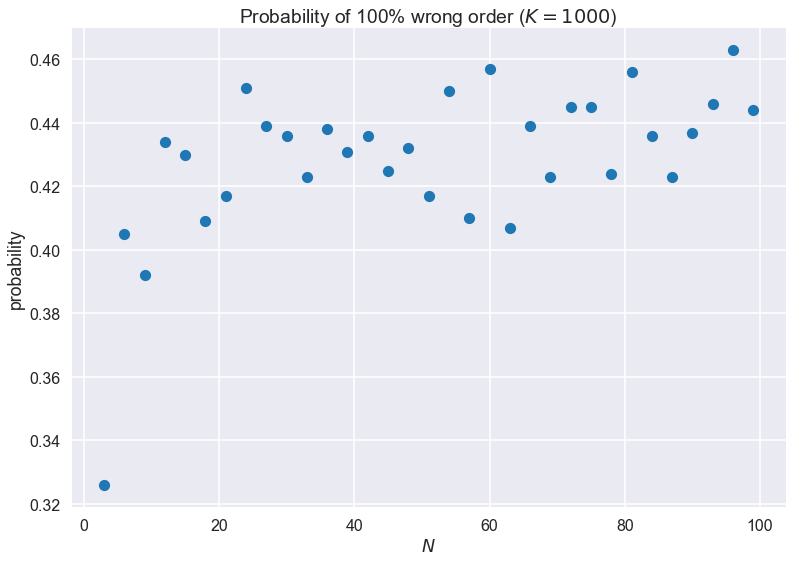

In [12]:
plt.plot(n_values,pr_values, 'o')
plt.title('Probability of 100%% wrong order ($K=%s$)' % K)
plt.ylabel('probability')
plt.xlabel('$N$')
plt.savefig('Intoxicated_Waiter_lists_%s.png' % (K), bbox_inches='tight')
plt.show()

In [13]:
# drop initial values (as interested for N large)
values = pr_values[5:]
print ('Probability is tending towards', sum(values) / len(values))

Probability is tending towards 0.43424999999999997


### Timing

In [14]:
%timeit run_trails(100000,10)  # lots of runs, few people

3.75 s ± 80.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit run_trails(10000,100)  # medium runs, medium people

3.54 s ± 87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%timeit run_trails(1000,1000)  # few runs, lots of people

3.66 s ± 115 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


---
## Step 2 &mdash; Convert to functions

---
## Step 3 &mdash; `numpy` implementation

---
## Step 4 &mdash; Tests

 * Reconcile implementations 
 * Test using known edge cases

---
## Conclusions

 * 

